In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_parquet("transaction_df.parquet")

In [3]:
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


In [4]:
# В качестве baseline - рекомендуем последнюю известную цену на каждый товар в каждом из городов.

In [5]:
df_baseline = []
for (place, product), place_product_df in df.groupby(["place", "product"]):
    temp_df = pd.DataFrame(range(1, 91), columns=["day_num"])
    temp_df["place"] = place
    temp_df["product"] = product
    temp_df["price"] = place_product_df.sort_values("datetime").iloc[-1]["price"]
    df_baseline.append(temp_df)
df_baseline = pd.concat(df_baseline)

In [6]:
df_baseline

,day_num,place,product,price
0,1,Анор Лондо,Целебные травы,13.63
1,2,Анор Лондо,Целебные травы,13.63
2,3,Анор Лондо,Целебные травы,13.63
3,4,Анор Лондо,Целебные травы,13.63
4,5,Анор Лондо,Целебные травы,13.63
...,...,...,...,...
85,86,Фалькония,Эстус,9.28
86,87,Фалькония,Эстус,9.28
87,88,Фалькония,Эстус,9.28
88,89,Фалькония,Эстус,9.28


In [7]:
df_baseline.to_parquet("df_baseline.parquet")

In [8]:
df_cost = pd.read_parquet('df_cost.parquet')
df_cost

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [10]:
df_competitors = pd.read_parquet('df_competitors.parquet')
df_competitors

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
39451,Фалькония,Эстус,Светлые Души,14.99,2218-09-17
39453,Фалькония,Эстус,Светлые Души,15.36,2218-09-20
39454,Фалькония,Эстус,Светлые Души,15.36,2218-09-22
39455,Фалькония,Эстус,Светлые Души,15.36,2218-09-23


In [11]:
df_weather = pd.read_parquet('weather_df.parquet')
df_weather

,place,hot,rain,snow,date
0,Фалькония,0,0,0,2216-01-02
1,Анор Лондо,1,0,0,2216-01-02
2,Врата Балдура,0,0,1,2216-01-02
3,Нокрон,0,0,0,2216-01-02
4,Кеджистан,0,0,1,2216-01-02
...,...,...,...,...,...
4995,Фалькония,0,0,0,2218-09-27
4996,Анор Лондо,0,0,1,2218-09-27
4997,Врата Балдура,1,0,0,2218-09-27
4998,Нокрон,0,0,0,2218-09-27


In [12]:
df_costs = pd.read_parquet('df_cost.parquet')
df_costs

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27
...,...,...,...,...
1112,Фалькония,Эстус,3.10,2218-07-29
1113,Фалькония,Эстус,7.20,2218-08-10
1114,Фалькония,Эстус,3.31,2218-08-27
1115,Фалькония,Эстус,3.26,2218-09-16


In [13]:
df_competitors.isna().sum()

place         0
product       0
competitor    0
price         0
date          0
dtype: int64

# Начальная предобработка датасетов

In [14]:
df.shape

(875036, 5)

In [15]:
df['amount'].describe() #так как нельзя продать меньше 0, удалим строки, где значение amount <=0

count    875036.000000
mean          0.739259
std           0.717872
min          -0.500000
25%           0.119508
50%           0.733257
75%           1.356674
max           1.999999
Name: amount, dtype: float64

In [16]:
df = df[df['amount'] >0]
df.shape #Таким образом было удалено 175559 заведомо неверных записей

(699477, 5)

In [17]:
df['price'].describe() #также цена не может быть отрицательной

count    699477.000000
mean       -300.197263
std        1408.223199
min       -9998.990000
25%           6.850000
50%           9.730000
75%          13.800000
max          31.200000
Name: price, dtype: float64

In [18]:
df = df[df['price'] > 0]
df.shape #таким образом была удалено 43501 заведомо неверная запись

(655976, 5)

In [77]:
df_competitors.describe()

,price
count,31799.000000
mean,11.894810
std,5.574935
min,2.850000
25%,7.780000
50%,11.050000
75%,15.030000
max,31.940000


In [79]:
df_costs.describe()

,cost
count,1117.000000
mean,6.859955
std,3.856876
min,1.180000
25%,3.910000
50%,5.930000
75%,8.860000
max,24.520000


In [19]:
df['date'] = df['datetime'].dt.date
df.groupby('date').count() #таким образом, содержатся наблюдения по 1000 разных дат

,product,price,amount,place,datetime
date,,,,,
2216-01-02,646,646,646,646,646
2216-01-03,669,669,669,669,669
2216-01-04,654,654,654,654,654
2216-01-05,639,639,639,638,639
2216-01-06,607,607,607,606,607
...,...,...,...,...,...
2218-09-23,667,667,667,667,667
2218-09-24,621,621,621,621,621
2218-09-25,662,662,662,662,662


Удалим время, в которое была совершена операция, так как прибыль и выручка будут считаться по дням и необходимо будет сгруппировать наблюдения, произошедние в один день

In [20]:
df.drop('datetime', axis = 1, inplace = True)
df 

,product,price,amount,place,date
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27


In [21]:
df['revenue_per_one_transac'] = df['price'] * df['amount']
df

,product,price,amount,place,date,revenue_per_one_transac
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02,4.844288
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02,3.441555
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02,2.423371
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02,5.331929
6,Целебные травы,3.90,1.736619,Анор Лондо,2216-01-02,6.772816
...,...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27,10.014083
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27,14.668128
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27,16.133202
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27,3.993555


In [22]:
df_agg = df.groupby(['date', 'product','place']).agg(revenue = ('revenue_per_one_transac', 'sum'),
                                                    price = ('price', 'mean'),
                                                    quantity = ('amount', 'sum')).reset_index()

In [23]:
df_agg

,date,product,place,revenue,price,quantity
0,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874
1,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272
2,2216-01-02,Целебные травы,Кеджистан,193.165796,3.69,52.348454
3,2216-01-02,Целебные травы,Нокрон,122.494512,2.73,44.869785
4,2216-01-02,Целебные травы,Фалькония,246.536200,6.39,38.581565
...,...,...,...,...,...,...
14993,2218-09-27,Эстус,Анор Лондо,474.413176,10.68,44.420709
14994,2218-09-27,Эстус,Врата Балдура,521.387209,20.33,25.646198
14995,2218-09-27,Эстус,Кеджистан,1102.900616,24.42,45.163825
14996,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824


Таким образом, был получен датасет, содержащий информацию о выручке по отдельным продуктам в разных городах в зависимости от даты

# Объединение датасетов

Для объединения датасетов в один, создается столбец, выступающий в качестве индекса, и содержащий информацию, уникальную для каждого наблюдения (в случае с датасетом по транзакциям и погоде - это место и дата)

In [24]:
df_agg['index'] = 0
df_agg

,date,product,place,revenue,price,quantity,index
0,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874,0
1,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272,0
2,2216-01-02,Целебные травы,Кеджистан,193.165796,3.69,52.348454,0
3,2216-01-02,Целебные травы,Нокрон,122.494512,2.73,44.869785,0
4,2216-01-02,Целебные травы,Фалькония,246.536200,6.39,38.581565,0
...,...,...,...,...,...,...,...
14993,2218-09-27,Эстус,Анор Лондо,474.413176,10.68,44.420709,0
14994,2218-09-27,Эстус,Врата Балдура,521.387209,20.33,25.646198,0
14995,2218-09-27,Эстус,Кеджистан,1102.900616,24.42,45.163825,0
14996,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824,0


In [25]:
for i in range(len(df_agg)):
    df_agg['index'].iloc[i] = str(df_agg['date'].iloc[i]) +str(df_agg['place'].iloc[i])

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [26]:
df_agg

,date,product,place,revenue,price,quantity,index
0,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874,2216-01-02Анор Лондо
1,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272,2216-01-02Врата Балдура
2,2216-01-02,Целебные травы,Кеджистан,193.165796,3.69,52.348454,2216-01-02Кеджистан
3,2216-01-02,Целебные травы,Нокрон,122.494512,2.73,44.869785,2216-01-02Нокрон
4,2216-01-02,Целебные травы,Фалькония,246.536200,6.39,38.581565,2216-01-02Фалькония
...,...,...,...,...,...,...,...
14993,2218-09-27,Эстус,Анор Лондо,474.413176,10.68,44.420709,2218-09-27Анор Лондо
14994,2218-09-27,Эстус,Врата Балдура,521.387209,20.33,25.646198,2218-09-27Врата Балдура
14995,2218-09-27,Эстус,Кеджистан,1102.900616,24.42,45.163825,2218-09-27Кеджистан
14996,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824,2218-09-27Нокрон


In [27]:
df_weather['index'] = 0
df_weather['date'] = df_weather['date'].dt.date
for i in range(len(df_weather)):
    df_weather['index'].iloc[i] = str(df_weather['date'].iloc[i]) +str(df_weather['place'].iloc[i])

D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [28]:
df_new = df_agg.set_index('index').join(df_weather.set_index('index'), lsuffix='', rsuffix='_', how = 'inner').drop(['place_','date_'], axis = 1)

In [29]:
df_competitors

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
39451,Фалькония,Эстус,Светлые Души,14.99,2218-09-17
39453,Фалькония,Эстус,Светлые Души,15.36,2218-09-20
39454,Фалькония,Эстус,Светлые Души,15.36,2218-09-22
39455,Фалькония,Эстус,Светлые Души,15.36,2218-09-23


После объединения датасета с конкурентами для дальнейшего анализа предполагается добавление столбцов с информацией о ценах конкурентов, поэтому будет происходить join общего датасета последовательно с подвыборкой из датасета о конкурентах, содержащей информацию о каждом из них

In [30]:
df_competitors['date'] = df_competitors['date'].dt.date
df_competitors['competitor'].unique()

array(['Арториас&Co', 'Длань господня', 'ЛилIT', 'Светлые Души'],
      dtype=object)

В данном случае такие показатели как дата, место и товар будут определять индекс отдельного наблюдения, так как конкуренты продают различные наименования товаров в различных местах

In [31]:
df1 = df_competitors[df_competitors['competitor'] == 'Арториас&Co']
df1['index'] = 0
for i in range(len(df1)):
    df1['index'].iloc[i] = str(df1['date'].iloc[i]) +str(df1['place'].iloc[i]) + str(df1['product'].iloc[i])
df1 = df1.rename(columns = {'price' :'Арториас&Co'})


C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\1670848992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['index'] = 0
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
D:\anaconda\lib\site-packages\pandas\core\indexing.py:1965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [32]:
df2 = df_competitors[df_competitors['competitor'] == 'Длань господня']
df2['index'] = 0
for i in range(len(df2)):
    df2['index'].iloc[i] = str(df2['date'].iloc[i]) +str(df2['place'].iloc[i]) + str(df2['product'].iloc[i])
df2 = df2.rename(columns = {'price' :'Длань господня'})

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\1190816293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['index'] = 0


In [33]:
df3 = df_competitors[df_competitors['competitor'] == 'ЛилIT']
df3['index'] = 0
for i in range(len(df3)):
    df3['index'].iloc[i] = str(df3['date'].iloc[i]) +str(df3['place'].iloc[i]) + str(df3['product'].iloc[i])
df3 = df3.rename(columns = {'price' :'ЛилIT'})

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\2789744813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['index'] = 0


In [34]:
df4 = df_competitors[df_competitors['competitor'] == 'Светлые Души']
df4['index'] = 0
for i in range(len(df4)):
    df4['index'].iloc[i] = str(df4['date'].iloc[i]) +str(df4['place'].iloc[i]) + str(df4['product'].iloc[i])
df4 = df4.rename(columns = {'price' :'Светлые Души'})

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\773493144.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['index'] = 0


In [35]:
df_new['index'] = 0
for i in range(len(df_new)):
    df_new['index'].iloc[i] = str(df_new['date'].iloc[i]) +str(df_new['place'].iloc[i]) + str(df_new['product'].iloc[i])

In [36]:
df_new = df_new.set_index('index').join(df1.set_index('index'), lsuffix='', rsuffix='_', how = 'left').drop(['product_', 'place_','competitor', 'date_'], axis = 1)

In [37]:
df_new['index'] = 0
for i in range(len(df_new)):
    df_new['index'].iloc[i] = str(df_new['date'].iloc[i]) +str(df_new['place'].iloc[i]) + str(df_new['product'].iloc[i])

In [38]:
df_new = df_new.set_index('index').join(df2.set_index('index'), lsuffix='', rsuffix='_', how = 'left').drop(['product_', 'place_','competitor', 'date_'], axis = 1)

In [39]:
df_new['index'] = 0
for i in range(len(df_new)):
    df_new['index'].iloc[i] = str(df_new['date'].iloc[i]) +str(df_new['place'].iloc[i]) + str(df_new['product'].iloc[i])

In [40]:
df_new = df_new.set_index('index').join(df3.set_index('index'), lsuffix='', rsuffix='_', how = 'left').drop(['product_', 'place_','competitor', 'date_'], axis = 1)

In [41]:
df_new['index'] = 0
for i in range(len(df_new)):
    df_new['index'].iloc[i] = str(df_new['date'].iloc[i]) +str(df_new['place'].iloc[i]) + str(df_new['product'].iloc[i])

In [42]:
df_new = df_new.set_index('index').join(df4.set_index('index'), lsuffix='', rsuffix='_', how = 'left').drop(['product_', 'place_','competitor', 'date_'], axis = 1)

Также можно добавить информацию об издержках аналогичным образом

In [43]:
df_cost['date'] = df_cost['date'].dt.date
df_cost['index'] = 0
for i in range(len(df_cost)):
    df_cost['index'].iloc[i] = str(df_cost['date'].iloc[i]) +str(df_cost['place'].iloc[i]) + str(df_cost['product'].iloc[i])

In [44]:
df_new = df_new.join(df_cost.set_index('index'), lsuffix='', rsuffix='_', how = 'left')
df_new = df_new.drop(['place_','product_','date_'], axis = 1)

После  объединения датасетов получен один общий, который содержит информацию как о цене и выручке предприятия в зависимости от даты, места и товара, о погоде в зависимости от даты и места, так и о ценах конкурентов одновременно с информацией об издержках предприятия

In [45]:
df_new

,date,product,place,revenue,price,quantity,hot,rain,snow,Арториас&Co,Длань господня,ЛилIT,Светлые Души,cost
index,,,,,,,,,,,,,,
2216-01-02Анор ЛондоЦелебные травы,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874,1,0,0,NaN,4.21,NaN,NaN,2.07
2216-01-02Анор ЛондоЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Анор Лондо,483.433896,9.21,52.490108,1,0,0,9.79,NaN,NaN,NaN,3.46
2216-01-02Анор ЛондоЭстус,2216-01-02,Эстус,Анор Лондо,168.595198,3.60,46.831999,1,0,0,NaN,NaN,NaN,NaN,1.97
2216-01-02Врата БалдураЦелебные травы,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272,0,0,1,7.68,7.81,NaN,NaN,3.63
2216-01-02Врата БалдураЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Врата Балдура,351.992592,13.42,26.228956,0,0,1,NaN,11.96,12.50,NaN,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218-09-27НокронЭльфийская пыльца,2218-09-27,Эльфийская пыльца,Нокрон,755.270336,18.11,41.704602,0,0,0,NaN,NaN,NaN,17.92,12.45
2218-09-27НокронЭстус,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824,0,0,0,NaN,NaN,10.93,10.45,5.39
2218-09-27ФальконияЦелебные травы,2218-09-27,Целебные травы,Фалькония,498.617984,10.97,45.452870,0,0,0,11.29,15.03,NaN,NaN,NaN


Однако в датасете появилось множество пропусков, так как не была известна информация обо всех выставленных конкурентами ценами, а также издержки для каждой даты (исхожу из предположения, что в данных указаны только ситуации изменения издержек на одну единицу товара, поэтому можно заполнить эти данные, основываясь на соседних данных). Учитывая специфику правил, что цена не может меняться чаще чем раз в три дня, заполнение пропусков будет выполнено методом обратного прохода: (на место пропуска будет выставлена цена первого числового наблюдения, следующего за nan). Так как существует вероятность, что ближе к концу датасета останутся nan из-за того, что последние наблюдаемые строки также могут быть пропусками, то для исправления всех пропусков, далее будет осуществлено заполнение методом прямого прохода 

Пропуски будут заполнены отдельно для каждого места и продукта

In [46]:
for place in df_new['place'].unique():
    for product in df_new['product'].unique():
        df_new[(df_new['product'] == product)&(df_new['place'] == place)] = df_new[(df_new['product'] == product)&(df_new['place'] == place)].fillna(method = 'bfill')
        df_new[(df_new['product'] == product)&(df_new['place'] == place)] = df_new[(df_new['product'] == product)&(df_new['place'] == place)].fillna(method = 'ffill')

In [47]:
df_new

,date,product,place,revenue,price,quantity,hot,rain,snow,Арториас&Co,Длань господня,ЛилIT,Светлые Души,cost
index,,,,,,,,,,,,,,
2216-01-02Анор ЛондоЦелебные травы,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874,1,0,0,3.78,4.21,4.18,3.75,2.07
2216-01-02Анор ЛондоЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Анор Лондо,483.433896,9.21,52.490108,1,0,0,9.79,9.67,8.88,9.03,3.46
2216-01-02Анор ЛондоЭстус,2216-01-02,Эстус,Анор Лондо,168.595198,3.60,46.831999,1,0,0,4.10,4.04,3.70,4.22,1.97
2216-01-02Врата БалдураЦелебные травы,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272,0,0,1,7.68,7.81,8.01,8.66,3.63
2216-01-02Врата БалдураЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Врата Балдура,351.992592,13.42,26.228956,0,0,1,14.13,11.96,12.50,14.15,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218-09-27НокронЭльфийская пыльца,2218-09-27,Эльфийская пыльца,Нокрон,755.270336,18.11,41.704602,0,0,0,18.25,15.78,14.44,17.92,12.45
2218-09-27НокронЭстус,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824,0,0,0,11.09,8.67,10.93,10.45,5.39
2218-09-27ФальконияЦелебные травы,2218-09-27,Целебные травы,Фалькония,498.617984,10.97,45.452870,0,0,0,11.29,15.03,14.75,10.90,4.58


In [48]:
df_new.isna().sum()

date              0
product           0
place             0
revenue           0
price             0
quantity          0
hot               0
rain              0
snow              0
Арториас&Co       0
Длань господня    0
ЛилIT             0
Светлые Души      0
cost              0
dtype: int64

Рассчитаем прибыль

In [49]:
df_new['profit'] = df_new['revenue'] - df_new['cost'] * df_new['quantity']
df_new

,date,product,place,revenue,price,quantity,hot,rain,snow,Арториас&Co,Длань господня,ЛилIT,Светлые Души,cost,profit
index,,,,,,,,,,,,,,,
2216-01-02Анор ЛондоЦелебные травы,2216-01-02,Целебные травы,Анор Лондо,147.431210,3.90,37.802874,1,0,0,3.78,4.21,4.18,3.75,2.07,69.179260
2216-01-02Анор ЛондоЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Анор Лондо,483.433896,9.21,52.490108,1,0,0,9.79,9.67,8.88,9.03,3.46,301.818122
2216-01-02Анор ЛондоЭстус,2216-01-02,Эстус,Анор Лондо,168.595198,3.60,46.831999,1,0,0,4.10,4.04,3.70,4.22,1.97,76.336159
2216-01-02Врата БалдураЦелебные травы,2216-01-02,Целебные травы,Врата Балдура,239.945042,7.29,32.914272,0,0,1,7.68,7.81,8.01,8.66,3.63,120.466235
2216-01-02Врата БалдураЭльфийская пыльца,2216-01-02,Эльфийская пыльца,Врата Балдура,351.992592,13.42,26.228956,0,0,1,14.13,11.96,12.50,14.15,5.92,196.717171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218-09-27НокронЭльфийская пыльца,2218-09-27,Эльфийская пыльца,Нокрон,755.270336,18.11,41.704602,0,0,0,18.25,15.78,14.44,17.92,12.45,236.048045
2218-09-27НокронЭстус,2218-09-27,Эстус,Нокрон,470.093720,9.97,47.150824,0,0,0,11.09,8.67,10.93,10.45,5.39,215.950776
2218-09-27ФальконияЦелебные травы,2218-09-27,Целебные травы,Фалькония,498.617984,10.97,45.452870,0,0,0,11.29,15.03,14.75,10.90,4.58,290.443839


Разделим датасет на 15 датасетов, в которых будут содержаться информация о наблюдениях для каждого отдельного товара и места, чтобы делать прогноз и обучать отдельные модели для них

Для отдельного датасета построим графики показателей, чтобы увидеть закономерности, предполагая, что товары в регионах ведут себя схожим образом

Text(0.5, 0.98, 'Показатели для целебных трав в Анор Лондо')

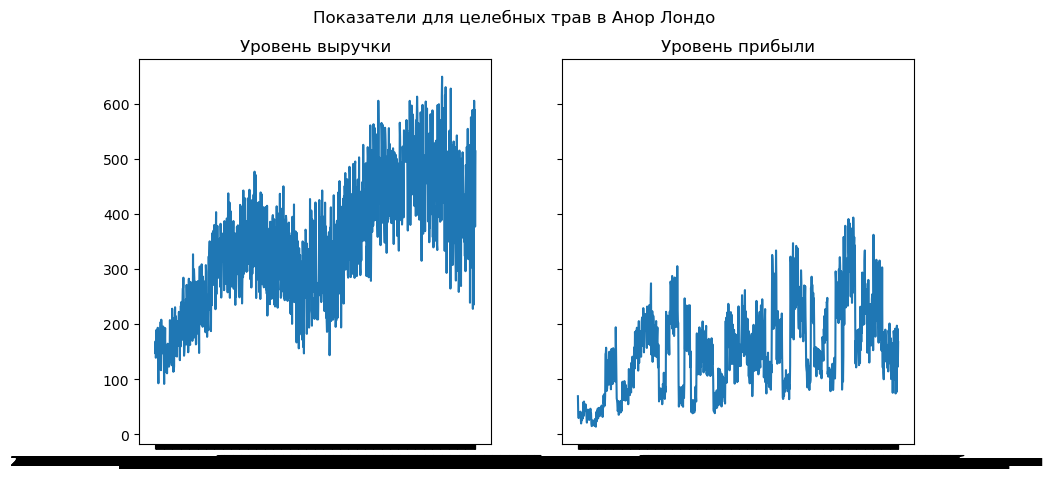

In [71]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey=True, figsize = (10,5))
ax1.plot(df_anor_travy['revenue'])
ax2.plot(df_anor_travy['profit'])
ax1.set_title('Уровень выручки')
ax2.set_title('Уровень прибыли')
fig.suptitle('Показатели для целебных трав в Анор Лондо')

можно увидеть существование возрастающего тренда как для выручки, так и для прибыли, с существованием определенной сезонности, проявляющейся в колебаниях показателей со временем

Text(0.5, 1.0, 'Уровень издержек по целебным травам в Анор Лонде')

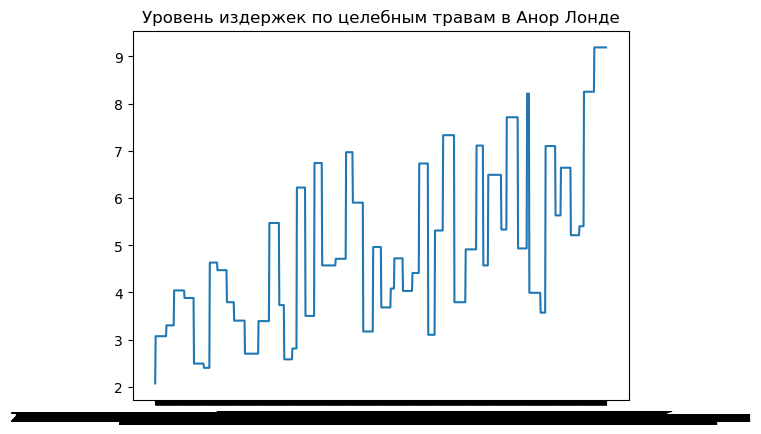

In [68]:
plt.plot(df_anor_travy['cost'])
plt.title('Уровень издержек по целебным травам в Анор Лонде')

В издержках сезонность также достаточно сильно выражена

Text(0.5, 0.98, 'Цены конкурентов для целебных трав в Анор Лондо')

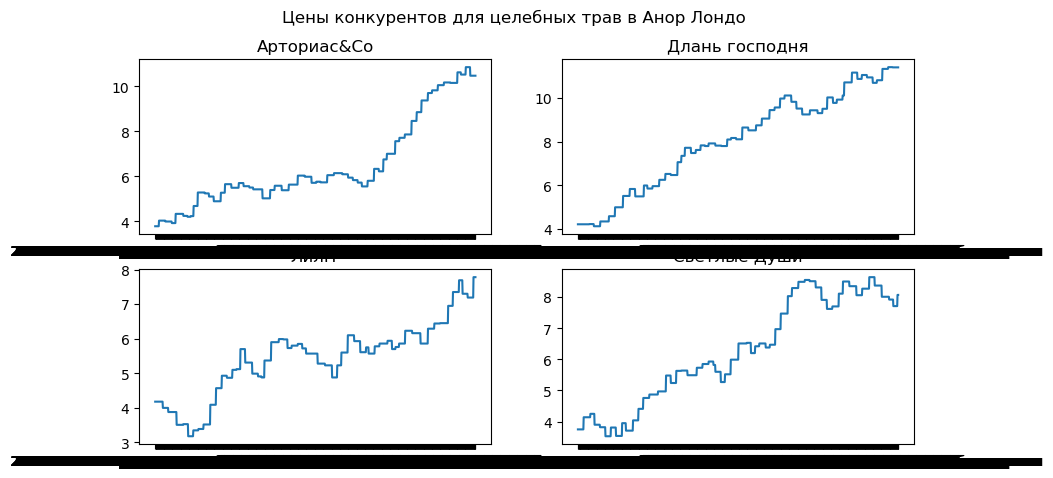

In [75]:
fig, axs = plt.subplots(2,2,figsize = (10,5))
axs[0,0].plot(df_anor_travy['Арториас&Co'])
axs[0,1].plot(df_anor_travy['Длань господня'])
axs[1,0].plot(df_anor_travy['ЛилIT'])
axs[1,1].plot(df_anor_travy['Светлые Души'])
axs[0,0].set_title('Арториас&Co')
axs[0,1].set_title('Длань господня')
axs[1,0].set_title('ЛилIT')
axs[1,1].set_title('Светлые Души')
fig.suptitle('Цены конкурентов для целебных трав в Анор Лондо')

У всех конкурентов четко виден восходящий тренд

Text(0.5, 1.0, 'Цена целебных трав в Анор Лонде')

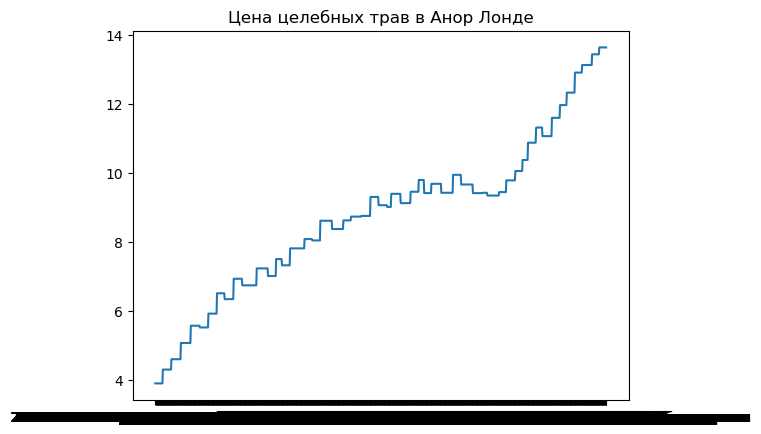

In [76]:
plt.plot(df_anor_travy['price'])
plt.title('Цена целебных трав в Анор Лонде')

Цены данной компании тоже росли

# Выставление цен

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [50]:
df_final = pd.DataFrame({'day_num': list(np.zeros(1350)), 'place': list(np.zeros(1350)), 'product': list(np.zeros(1350)),'price': list(np.zeros(1350))})

In [51]:
df_anor_travy = df_new[(df_new['product'] == 'Целебные травы')&(df_new['place'] == 'Анор Лондо')]
df_anor_pyltca = df_new[(df_new['product'] == 'Эльфийская пыльца')&(df_new['place'] == 'Анор Лондо')]
df_anor_estus = df_new[(df_new['product'] == 'Эстус')&(df_new['place'] == 'Анор Лондо')]
df_baldura_travy = df_new[(df_new['product'] == 'Целебные травы')&(df_new['place'] == 'Врата Балдура')]
df_baldura_pyltca = df_new[(df_new['product'] == 'Эльфийская пыльца')&(df_new['place'] == 'Врата Балдура')]
df_baldura_estus = df_new[(df_new['product'] == 'Эстус')&(df_new['place'] == 'Врата Балдура')]
df_kedzi_travy = df_new[(df_new['product'] == 'Целебные травы')&(df_new['place'] == 'Кеджистан')]
df_kedzi_pyltca = df_new[(df_new['product'] == 'Эльфийская пыльца')&(df_new['place'] == 'Кеджистан')]
df_kedzi_estus = df_new[(df_new['product'] == 'Эстус')&(df_new['place'] == 'Кеджистан')]
df_nokron_travy = df_new[(df_new['product'] == 'Целебные травы')&(df_new['place'] == 'Нокрон')]
df_nokron_pyltca = df_new[(df_new['product'] == 'Эльфийская пыльца')&(df_new['place'] == 'Нокрон')]
df_nokron_estus = df_new[(df_new['product'] == 'Эстус')&(df_new['place'] == 'Нокрон')]
df_falc_travy = df_new[(df_new['product'] == 'Целебные травы')&(df_new['place'] == 'Фалькония')]
df_falc_pyltca = df_new[(df_new['product'] == 'Эльфийская пыльца')&(df_new['place'] == 'Фалькония')]
df_falc_estus = df_new[(df_new['product'] == 'Эстус')&(df_new['place'] == 'Фалькония')]


In [52]:
def categorical_work(df_pred, column):
    basic_list = []
    for _ in range(90):
        basic_list.append(np.random.choice([0,1],p=[1-df_pred[column].mean(),df_pred[column].mean()]))
    return np.array(basic_list) # значения бинарных переменных заполняются в соответствии с их частотой в исходном датасете
    

In [60]:
def get_prediction(df_object,df_final):
    df_object['extra'] = np.arange(1,len(df_object)+1) #блок 1 -создание в датасете переменных, на которых будет строиться трендовая модель
    df_object['extra2'] = df_object['extra'] **2
    df_object['extra3'] = df_object['extra'] **3
    df_object['extra4'] = df_object['extra'] **4
    df_temp = pd.DataFrame(np.arange(1001,1091), columns = ['extra']) # создание временного датасета
    for elem in ['quantity','Арториас&Co','Длань господня','ЛилIT','Светлые Души','cost']:
        lr = LinearRegression()
        lr.fit(df_object[['extra', 'extra2','extra3','extra4']], df_object[elem])
        df_temp[elem] = df_temp['extra'] * lr.coef_[0] + df_temp['extra']**2 * lr.coef_[1] +  df_temp['extra']**3 * lr.coef_[2] + df_temp['extra']**4*lr.coef_[3] + lr.intercept_
    # для каждого числового показателя на основании трендовой модели строится прогноз во временном датасете
    for elem in ['hot','rain','snow']:
        df_temp[elem] = categorical_work(df_object, elem)
    
    y=df_object['price']
    X = df_object[['quantity','Арториас&Co','Длань господня','ЛилIT','Светлые Души','cost','hot','rain','snow']]
    X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 14)
    rf = RandomForestRegressor(200) #оценивается модель случайного леса для объяснения цены компании на отрезке в 100 наблюдений,
    # R^2 составил 0.996
    rf.fit(X_train, y_train)
    
    df_temp['pred'] = np.round(rf.predict((df_temp.drop('extra', axis = 1))),2) #на основании весов обученной модели прогнозируется
    df_temp['place'] = df_object['place'].iloc[0] #цена на следующие 90 периодов
    df_temp['product'] = df_object['product'].iloc[0]
    
    
    for elen in range(len(df_final['day_num'])): #итоговый датасет заполняется значениями
        if df_final['day_num'].iloc[elen] == 0:
            break
    for i in range(len(df_temp)):
        df_final['day_num'][elen+i] = int(i+1)
        df_final['place'][elen+i] = df_temp['place'].iloc[i]
        df_final['product'][elen+i] = df_temp['product'].iloc[i]
        df_final['price'][elen+i] = df_temp['pred'].iloc[i]
    return df_final
    
    
    

In [61]:
for dataframe in [df_anor_travy,
df_anor_pyltca,
df_anor_estus,
df_baldura_travy,
df_baldura_pyltca,
df_baldura_estus,
df_kedzi_travy,
df_kedzi_pyltca,
df_kedzi_estus,
df_nokron_travy,
df_nokron_pyltca,
df_nokron_estus,
df_falc_travy,
df_falc_pyltca,
df_falc_estus]:
    df_final = get_prediction(dataframe,df_final)

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object['extra'] = np.arange(1,len(df_object)+1) #блок 1
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_object['extra2'] = df_object['extra'] **2
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day_num'][elen+i] = int(i+1)
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price'][elen+i] = df_temp['pred'].iloc[i]
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day_num'][elen+i] = int(i+1)
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price'][elen+i] = df_temp['pred'].iloc[i]
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day_num'][elen+i] = int(i+1)
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['price'][elen+i] = df_temp['pred'].iloc[i]
C:\Users\Андрей\AppData\Local\Temp\ipykernel_16800\3608132748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [62]:
df_final.to_parquet("df_final.parquet")

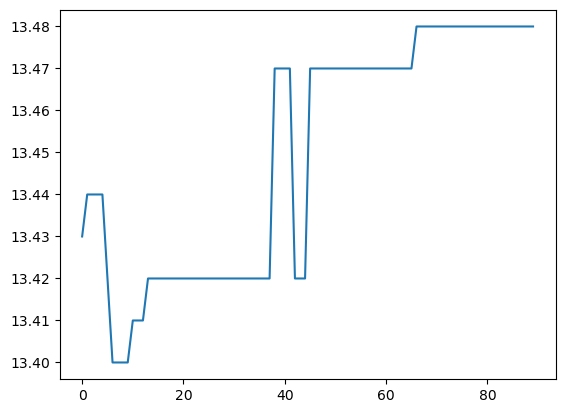

In [81]:
plt.plot(df_final[(df_final['place'] == 'Анор Лондо') &(df_final['product'] == 'Целебные травы')]['price'])